# Exercise sheet 13

---

## Exercise 1 - Exoplanets, with errors

For this exercise, you will need to load the dataset exoplanets-errors from the course’s github repository: https://github.com/bodemory/ASMP. This is the same dataset as the one you used in the previous sheet except that this dataset includes measurement errors. Revisit the multi-level exoplanets exercise from Sheet 12 by including measurement errors. How do the results change compared to the dataset without uncertainties? As in the course, start by including error bars on the outcome first and then on the predictor(s). Then repeat the fit two times, first by doubling the error bar size on the outcomes/predictors, second by halving them. Compare the inferences of these three models (original error bars, double & half).

---

We start by recreating the code from the last exercise sheet

In [1]:
# Loadign the library and data set
library(rethinking)
exoplanets <- read.csv(file = "D:\\Users\\Immanuel\\Documents\\_Programming\\my_r\\advanced_statistics\\exercise_sheet_12\\ASMP\\exoplanets_errors.csv", header = TRUE, sep = ",", skip = 65)
exoplanets

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,⋯,st_tefferr2,st_tefflim,st_mass,st_masserr1,st_masserr2,st_masslim,st_rad,st_raderr1,st_raderr2,st_radlim
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
WTS-1 b,Transit,1,3.352057,1.3e-05,-1.5e-05,0,0.04700,0.00100,-0.00100,⋯,-200,0,1.20,0.10,-0.10,0,1.15,0.10,-0.12,0
WASP-89 b,Transit,1,3.356423,2.5e-06,-2.5e-06,0,0.04270,0.00120,-0.00120,⋯,-90,0,0.92,0.08,-0.08,0,0.88,0.03,-0.03,0
WASP-81 b,Transit,1,2.716476,2.3e-06,-2.3e-06,0,0.03908,0.00070,-0.00072,⋯,-120,0,1.08,0.06,-0.06,0,1.28,0.04,-0.04,0
WASP-80 b,Transit,1,3.067852,8.3e-07,-7.9e-07,0,0.03440,0.00100,-0.00110,⋯,-94,0,0.58,0.05,-0.05,0,0.59,0.02,-0.02,0
WASP-59 b,Transit,1,7.919585,1.0e-05,-1.0e-05,0,0.06970,0.00110,-0.00110,⋯,-150,0,0.72,0.04,-0.04,0,0.61,0.04,-0.04,0
WASP-53 b,Transit,2,3.309844,2.0e-06,-2.0e-06,0,0.04101,0.00083,-0.00091,⋯,-60,0,0.84,0.05,-0.05,0,0.80,0.02,-0.02,0
WASP-5 b,Transit,1,1.628428,2.2e-06,-4.9e-06,0,0.02670,0.00120,-0.00080,⋯,-100,0,0.96,0.13,-0.09,0,1.03,0.06,-0.07,0
WASP-19 b,Transit,1,0.788839,4.0e-08,-4.0e-08,0,0.01634,0.00024,-0.00024,⋯,-71,0,0.90,0.04,-0.04,0,1.00,0.02,-0.02,0
WASP-162 b,Transit,1,9.624680,1.0e-05,-1.0e-05,0,0.08710,0.00130,-0.00130,⋯,-100,0,0.95,0.04,-0.04,0,1.11,0.05,-0.05,0


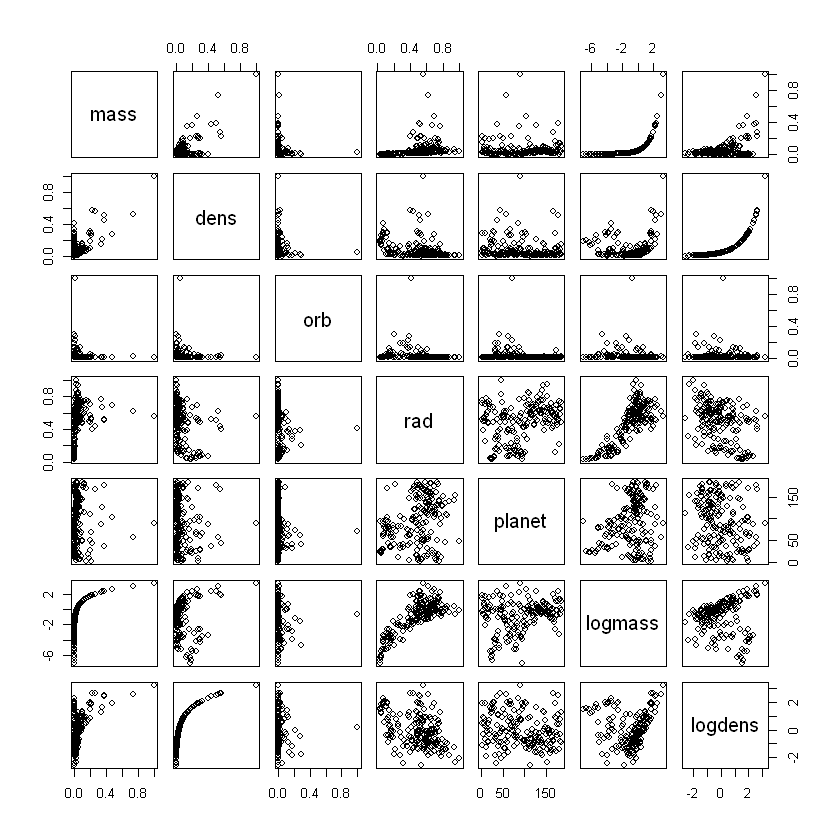

In [43]:
# Adjusting the data
d <- data.frame(list(mass = exoplanets$pl_bmassj))

d$mass <- exoplanets$pl_bmassj / max(exoplanets$pl_bmassj)
d$dens <- exoplanets$pl_dens / max(exoplanets$pl_dens)
d$orb <- exoplanets$pl_orbper / max(exoplanets$pl_orbper)
d$rad <- exoplanets$pl_radj / max(exoplanets$pl_radj)

d$planet <- c(1:nrow(d))

d$logmass <- log(exoplanets$pl_bmassj)
d$logdens <- log(exoplanets$pl_dens)

pairs(d)

In a first try, in reference to the exercise session of last week, we build the model with a cutoff of a certain mass, where below we have a decreasing relation between density and mass and above we have a increasing relation.

In [3]:
# Model considering mass influencing density
model_cutoff <- ulam(
	alist(
		logdens ~ dnorm(mu, sigma),
		mu <- if_else(logmass <= cutoff, 1, 0) *
		(off_lower + slope_mass_lower * logmass) + #off_planet[planet] +
		if_else(logmass > cutoff, 1, 0) *
		(off_upper + slope_mass_upper * logmass),
		cutoff ~ dunif(0, 10),
		c(off_lower, off_upper) ~ dnorm(0, 10),
		#off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		#a_planet ~ dnorm(0, 10),
		#sigma_planet ~ dcauchy(0, 10),
		c(slope_mass_lower, slope_mass_upper) ~ dnorm(0, 10),
		sigma ~ dunif(0, 10)
	),
	data = d, iter = 4000, chains = 12, cores = 12, log_lik = TRUE
)

Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 27, column 16: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 27, column 100: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 35, column 16: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-

Running MCMC with 12 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 29, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 29, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 29, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 29, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 29, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 29, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47b3ea1.stan', line 29, column 4 to column 35)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 



Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 12 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 10 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 11 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 12 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 7 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 8 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Itera

See https://mc-stan.org/misc/warnings for details.




In [4]:
precis(model_cutoff, depth = 2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cutoff,0.2216429,0.10434913,0.05735692,0.4030772,14.749710,1.445698
off_upper,-1.1506424,0.13393944,-1.37259495,-0.9409134,99.224911,1.100292
off_lower,-0.6672029,0.19097467,-0.90147032,-0.1638749,8.575233,2.112734
slope_mass_upper,1.8330700,0.15416105,1.59685780,2.0983717,102.170623,1.087260
slope_mass_lower,-0.6624403,0.11273813,-0.83902609,-0.4540187,16.586554,1.491158
sigma,0.7143408,0.03276211,0.66188400,0.7709697,144.592435,1.084094


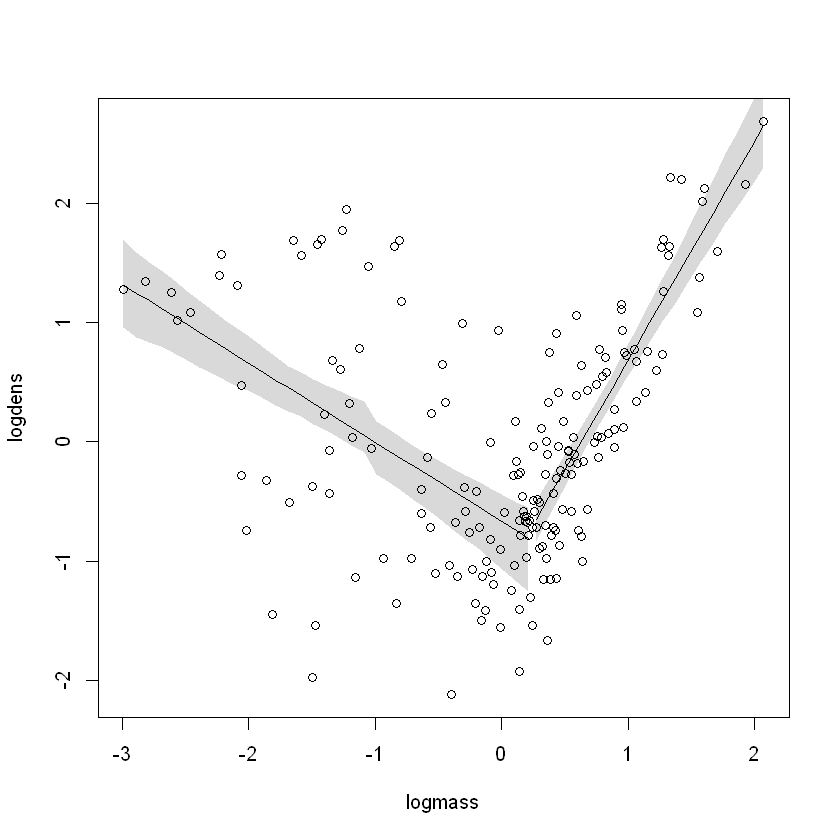

In [5]:
post <- extract.samples(model_cutoff, n = 1000000)
mu_link <- function(logmass) ifelse(logmass <= mean(post$cutoff), 1, 0) *
		(post$off_lower + post$slope_mass_lower * logmass) +
		ifelse(logmass > mean(post$cutoff), 1, 0) *
		(post$off_upper + post$slope_mass_upper * logmass)

plot(logdens ~ logmass, data = d)

logmass_seq <- seq(from = min(d$logmass), to = mean(post$cutoff), by = 0.1)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

logmass_seq <- seq(from = mean(post$cutoff) + 0.05, to = max(d$logmass), by = 0.1)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

Seeing these results, we think of removing the cutoff from the infered parameters and instead choosing it based on the results here.

In [50]:
# We fix the cutoff to a constant value
cutoff <- precis(model_cutoff, depth = 1)$mean[1]
cutoff_ary <- c()
for (index in 1:nrow(d)) {
	cutoff_ary <- append(cutoff_ary, cutoff)
}
d$cutoff_data <- cutoff_ary

mass,dens,orb,rad,planet,logmass,logdens,logdens_sd,cutoff_data
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1.472640e-01,0.065182186,0.0031990295,0.74874372,1,1.38879124,0.47623418,0.29849299,0.2216429
2.166728e-01,0.283400810,0.0032031959,0.52261307,2,1.77495235,1.94591015,0.06096070,0.2216429
2.677194e-02,0.013441296,0.0025924641,0.71809045,3,-0.31608155,-1.10262031,0.08926787,0.2216429
1.975762e-02,0.029028340,0.0029277993,0.50201005,4,-0.61989672,-0.33267944,0.05296554,0.2216429
3.169299e-02,0.097165992,0.0075580415,0.38944724,5,-0.14734059,0.87546874,0.25593337,0.2216429
7.829600e-02,0.092307692,0.0031587439,0.53969849,6,0.75706051,0.82417544,0.08408312,0.2216429
5.802424e-02,0.066396761,0.0015540872,0.54623116,7,0.45742485,0.49469624,0.19343840,0.2216429
3.925817e-02,0.019919028,0.0007528271,0.69949749,8,0.06672363,-0.70927656,0.08937984,0.2216429
1.909658e-01,0.279352227,0.0091852959,0.50251256,9,1.64865863,1.93152141,0.10969892,0.2216429


This is viable as the cutoff would within reason anyways be chosen arbitrarily.

In [7]:
# Model considering mass influencing density
model <- ulam(
	alist(
		logdens ~ dnorm(mu, sigma),
		mu <- if_else(logmass <= cutoff_data, 1, 0) *
		(off_lower + slope_mass_lower * logmass) + #off_planet[planet] +
		if_else(logmass > cutoff_data, 1, 0) *
		(off_upper + slope_mass_upper * logmass),
		c(off_lower, off_upper) ~ dnorm(0, 10),
		#off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		#a_planet ~ dnorm(0, 10),
		#sigma_planet ~ dcauchy(0, 10),
		c(slope_mass_lower, slope_mass_upper) ~ dnorm(0, 10),
		sigma ~ dunif(0, 10)
	),
	data = d, iter = 4000, chains = 12, cores = 12, log_lik = TRUE
)

Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44aad7eef.stan', line 26, column 16: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44aad7eef.stan', line 26, column 108: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44aad7eef.stan', line 34, column 16: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/

Running MCMC with 12 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44aad7eef.stan', line 28, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  200 / 4000 [  5%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44aad7eef.stan', line 28, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44aad7eef.stan', line 28, column 4 to column 35)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 



Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44aad7eef.stan', line 28, column 4 to column 35)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 1 Iteration:  900 / 4000 [ 22%]  (Warmup) 
Chain 1 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1100 / 4000 [ 27%]  (Warmup) 
Chain 1 Iteration: 1200 / 4000 [ 30%]  (Warmup) 
Chain 1 Iteration: 1300 / 4000 [ 32%]  (Warmup) 
Chain 1 Iteration: 1400 / 4000 [ 35%]  (Warmup) 
Chain 1 Iteration: 1500 / 4000 [ 37%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteration:

In [8]:
precis(model)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
off_upper,-1.1851515,0.14890180,-1.4221455,-0.9474326,13415.64,1.000266
off_lower,-0.6885099,0.09966101,-0.8482574,-0.5303522,14680.32,1.000382
slope_mass_upper,1.8648863,0.17498789,1.5841600,2.1460717,13600.69,1.000257
slope_mass_lower,-0.6627252,0.08864027,-0.8038917,-0.5205808,14727.91,1.000540
sigma,0.7127105,0.03766368,0.6546302,0.7751691,17471.75,1.000346


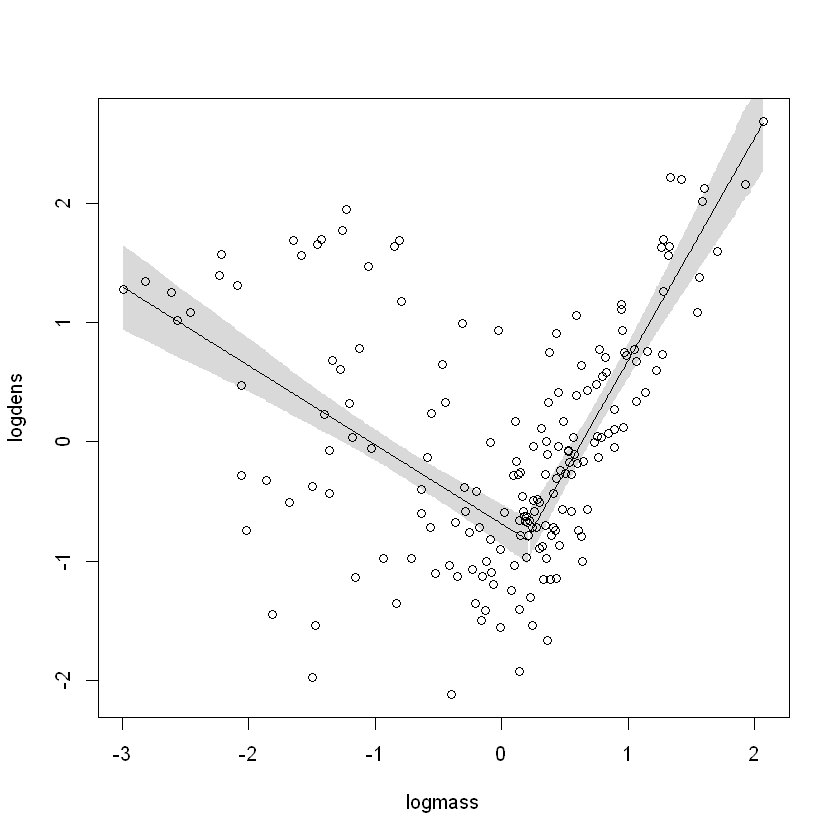

In [9]:
post <- extract.samples(model, n = 1000000)
mu_link <- function(logmass) ifelse(logmass <= cutoff, 1, 0) *
		(post$off_lower + post$slope_mass_lower * logmass) +
		ifelse(logmass > cutoff, 1, 0) *
		(post$off_upper + post$slope_mass_upper * logmass)

plot(logdens ~ logmass, data = d)

logmass_seq <- seq(from = min(d$logmass), to = cutoff, by = 0.01)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

logmass_seq <- seq(from = cutoff + 0.005, to = max(d$logmass), by = 0.01)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

In [10]:
compare(model_cutoff, model)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model,403.2227,22.72614,0.000000,NA,4.763967,0.8876094
model_cutoff,407.3558,22.77878,4.133102,1.022122,7.113396,0.1123906


As we can see, the model also thinks that the additional freedom of inferring the cutoff is superfluous. We may perform the same thing by introducing a categorical variable.

In [14]:
d$gas <- ifelse(d$logmass < cutoff, 1, 2)

In [16]:
# Model considering mass influencing density
model <- map2stan(
	alist(
		logdens ~ dnorm(mu, sigma),
		mu <- off + off_gas[gas] + # off_planet[planet] +
		slope_mass[gas] * logmass,
		off ~ dnorm(0, 10),
		off[gas] ~ dnorm(0, sigma_off),
		sigma_off ~ dcauchy(0, 10),
		#off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		#a_planet ~ dnorm(0, 10),
		#sigma_planet ~ dcauchy(0, 10),
		slope_mass[gas] ~ dnorm(0, sigma_slope),
		sigma_slope ~ dcauchy(0, 10),
		sigma ~ dcauchy(0, 10)
	),
	data = d, iter = 4000, chains = 12, cores = 12, #log_lik = TRUE
)

Warning message in map2stan(alist(logdens ~ dnorm(mu, sigma), mu <- off + off_gas[gas] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(logdens ~ dnorm(mu, sigma), mu <- off + off_gas[gas] + :
"Stripping scale attributes from variable logmass"
Warning message in map2stan(alist(logdens ~ dnorm(mu, sigma), mu <- off + off_gas[gas] + :
"Stripping scale attributes from variable logdens"


ERROR: Error in if (class(d[[xvp$group]]) != "integer") d[[xvp$group]] <- coerce_index(d[[xvp$group]]): Bedingung hat Länge > 1


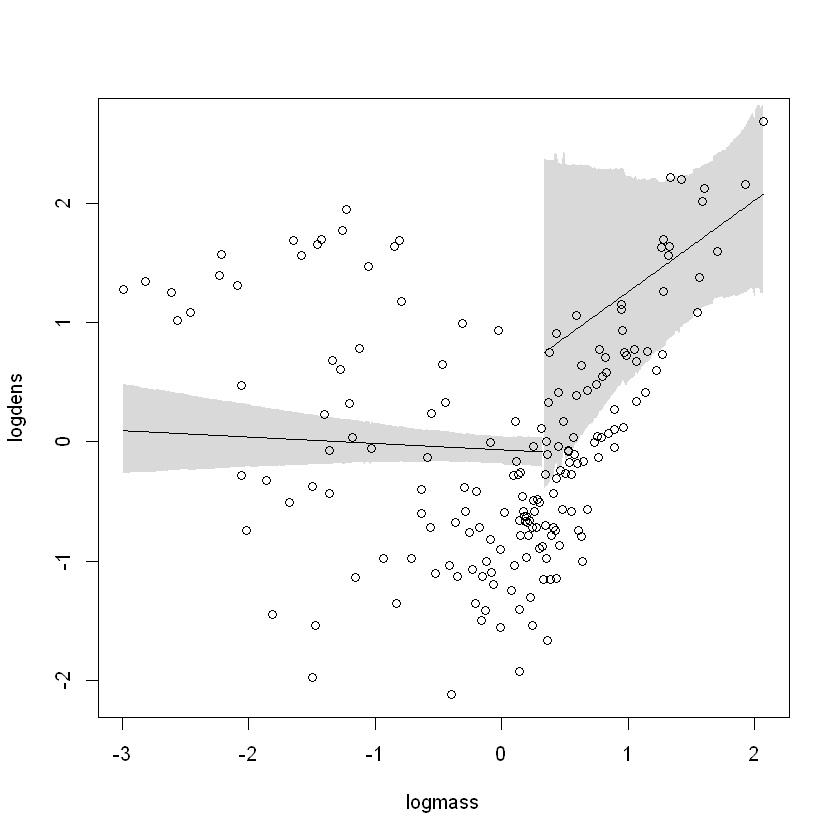

In [ ]:
post <- extract.samples(model)

plot(logdens ~ logmass, data = d)

mu_link <- function(logmass) post$off[, 1] + post$slope_mass[, 1] * logmass

logmass_seq <- seq(from = min(d$logmass), to = cutoff, by = 0.01)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

mu_link <- function(logmass) post$off[, 2] + post$slope_mass[, 2] * logmass

logmass_seq <- seq(from = cutoff + 0.005, to = max(d$logmass), by = 0.01)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

Yeah whatever, lets just look at the linear models.

---

Now lets first consider a boring linear model with errors.

---

In [21]:
d$dens_sd = exoplanets$pl_denserr1 / max(exoplanets$pl_dens)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.000769 0.003239 0.006883 0.021620 0.026316 0.222672        4 

In [27]:
summary(d)

      mass                dens               orb                 rad         
 Min.   :0.0000334   Min.   :0.003077   Min.   :0.0007528   Min.   :0.03166  
 1st Qu.:0.0056155   1st Qu.:0.016599   1st Qu.:0.0029278   1st Qu.:0.36131  
 Median :0.0231362   Median :0.033603   Median :0.0038258   Median :0.53618  
 Mean   :0.0569502   Mean   :0.084657   Mean   :0.0248373   Mean   :0.48796  
 3rd Qu.:0.0503122   3rd Qu.:0.093927   3rd Qu.:0.0117890   3rd Qu.:0.64774  
 Max.   :1.0000000   Max.   :1.000000   Max.   :1.0000000   Max.   :1.00000  
                                                                             
     planet         logmass.V1           logdens.V1       cutoff_data    
 Min.   :  1   Min.   :-2.9873026   Min.   :-2.1196668   Min.   :0.2216  
 1st Qu.: 47   1st Qu.:-0.4711225   1st Qu.:-0.7196981   1st Qu.:0.2216  
 Median : 93   Median : 0.2241299   Median :-0.1338788   Median :0.2216  
 Mean   : 93   Mean   : 0.0000000   Mean   : 0.0000000   Mean   :0.2216  
 3rd Q

In [24]:
model_error <- ulam(
	alist(
		dens_est ~ dnorm(mu, sigma),
		mu <- off + slope * mass,
		dens ~ dnorm(dens_est, dens_sd),
		dens_sd ~ dnorm(0, 1),
		off ~ dnorm(0, 10),
		slope ~ dnorm(0, 10),
		sigma ~ dcauchy(0, 10)
	),
	data = d, start = list(dens_est = d$dens), cores = 12, chains = 12, control = list(adapt_delta = 0.95)
)

Found 4 NA values in dens_sd and attempting imputation.

Init values were only set for a subset of parameters. 
Missing init values for the following parameters:
 - chain 1: off, slope, sigma, dens_sd_impute
 - chain 2: off, slope, sigma, dens_sd_impute
 - chain 3: off, slope, sigma, dens_sd_impute
 - chain 4: off, slope, sigma, dens_sd_impute
 - chain 5: off, slope, sigma, dens_sd_impute
 - chain 6: off, slope, sigma, dens_sd_impute
 - chain 7: off, slope, sigma, dens_sd_impute
 - chain 8: off, slope, sigma, dens_sd_impute
 - chain 9: off, slope, sigma, dens_sd_impute
 - chain 10: off, slope, sigma, dens_sd_impute
 - chain 11: off, slope, sigma, dens_sd_impute
 - chain 12: off, slope, sigma, dens_sd_impute




Running MCMC with 12 parallel chains...



Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: normal_lpdf: Scale parameter[38] is -0.796594, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 1 Exception: normal_lpdf: Scale parameter[38] is -0.796594, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: normal_lpdf: Scale parameter[76] is -0.868586, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 1 Exception: normal_lpdf: Scale parameter[76] is -0.868586, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 4

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter[38] is -0.960117, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter[38] is -2.23576, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter[38] is -2.51749, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter[38] is -2.5365, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like c

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter[38] is -2.1792, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter[71] is -6.21486, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like c

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter[38] is -2.07973, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter[38] is -1.7432, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like c

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter[38] is -1.60843, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter[38] is -3.4783, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like c

Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter[38] is -0.335919, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter[38] is -0.629808, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types lik

Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter[38] is -0.893147, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter[38] is -1.38019, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter[38] is -129.601, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter[38] is -0.0768888, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types lik

Chain 9 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter[38] is -1.25669, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 

Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter[38] is -1.70078, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like 

Chain 10 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter[38] is -2.50686, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 

Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter[38] is -2.15121, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable typ

Chain 11 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter[71] is -0.775687, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 

Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter[38] is -0.770041, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable t

Chain 12 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter[43] is -0.352631, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 

Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter[38] is -0.391579, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a47003713.stan', line 42, column 4 to column 46)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable t

Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 9 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 10 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 11 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 12 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 12 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 11 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 9 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




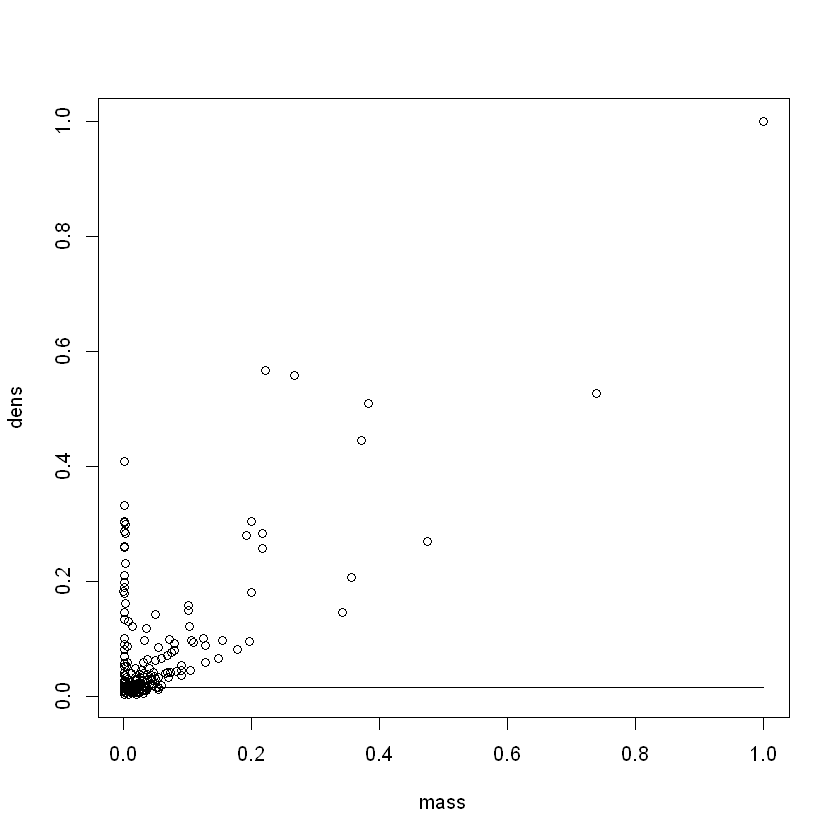

In [42]:
post <- extract.samples(model_error)

plot(dens ~ mass, data = d)

mu_link <- function(mass) post$off + post$slope * mass

mass_seq <- seq(from = 0, to = 1, by = 0.01)

mu <- sapply(mass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)
lines(mass_seq, mu_mean)
shade(mu_HPDI, mass_seq)

Obviously, this result is of no use. Lets also look the model from before with errors.

In [48]:
d$logdens_sd <- log(exoplanets$pl_denserr1 + exoplanets$pl_dens) - log(exoplanets$pl_dens)

mass,dens,orb,rad,planet,logmass,logdens,logdens_sd
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.472640e-01,0.065182186,0.0031990295,0.74874372,1,1.38879124,0.47623418,0.29849299
2.166728e-01,0.283400810,0.0032031959,0.52261307,2,1.77495235,1.94591015,0.06096070
2.677194e-02,0.013441296,0.0025924641,0.71809045,3,-0.31608155,-1.10262031,0.08926787
1.975762e-02,0.029028340,0.0029277993,0.50201005,4,-0.61989672,-0.33267944,0.05296554
3.169299e-02,0.097165992,0.0075580415,0.38944724,5,-0.14734059,0.87546874,0.25593337
7.829600e-02,0.092307692,0.0031587439,0.53969849,6,0.75706051,0.82417544,0.08408312
5.802424e-02,0.066396761,0.0015540872,0.54623116,7,0.45742485,0.49469624,0.19343840
3.925817e-02,0.019919028,0.0007528271,0.69949749,8,0.06672363,-0.70927656,0.08937984
1.909658e-01,0.279352227,0.0091852959,0.50251256,9,1.64865863,1.93152141,0.10969892


In [51]:
# Model considering mass influencing density
model <- ulam(
	alist(
		logdens_est ~ dnorm(mu, sigma),
		mu <- if_else(logmass <= cutoff_data, 1, 0) *
		(off_lower + slope_mass_lower * logmass) + #off_planet[planet] +
		if_else(logmass > cutoff_data, 1, 0) *
		(off_upper + slope_mass_upper * logmass),
		logdens ~ dnorm(logdens_est, logdens_sd),
		logdens_sd ~ dnorm(0, 1),
		c(off_lower, off_upper) ~ dnorm(0, 10),
		#off_planet[planet] ~ dnorm(a_planet, sigma_planet),
		#a_planet ~ dnorm(0, 10),
		#sigma_planet ~ dcauchy(0, 10),
		c(slope_mass_lower, slope_mass_upper) ~ dnorm(0, 10),
		sigma ~ dunif(0, 10)
	),
	data = d, iter = 4000, chains = 12, cores = 12, log_lik = TRUE
)

Found 4 NA values in logdens_sd and attempting imputation.

Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 47, column 16: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 47, column 108: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 56, column 16: The
    function `if_else` is deprecated and will be removed in Stan 2.32.0. Use
    the conditional operator (x ? y : z) instead; this can be automatically
    changed using the canonicalize flag for stanc


Running MCMC with 12 parallel chains, with 1 thread(s) per chain...



Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: normal_lpdf: Scale parameter[76] is -0.640881, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 1 Exception: normal_lpdf: Scale parameter[76] is -0.640881, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: normal_lpdf: Scale parameter[38] is -0.18222, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 1 Exception: normal_lpdf: Scale parameter[38] is -0.18222, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter[76] is -102.187, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter[71] is -0.132994, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types li

Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter[71] is -0.564334, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter[38] is -82.1519, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types li

Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter[38] is -1.41626, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter[76] is -0.569333, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types li

Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter[43] is -0.917031, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter[38] is -119.456, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types li

Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter[38] is -118.11, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter[71] is -0.839287, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types lik

Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter[38] is -0.869187, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter[71] is -0.256439, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types l

Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter[71] is -1.45324, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter[38] is -70.8054, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types lik

Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter[76] is -0.63881, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter[76] is -0.790109, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types li

Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter[38] is -0.196899, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 

Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter[71] is -0.00346325, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types

Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter[71] is -1.4769, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 

Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter[38] is -110.312, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable ty

Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter[71] is -0.0664759, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 

Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter[38] is -126.767, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable

Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter[76] is -0.306385, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 

Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter[71] is -1.0422, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable t

Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter[71] is -8.80666e-05, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter[71] is -2.54374e-05, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable t

Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 10 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 11 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 12 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter[71] is -2.60785e-05, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a442aa5182.stan', line 45, column 4 to column 55)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 



Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 7 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 12 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 9 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 10 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 11 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 6 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 8 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 7 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 9 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 12 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 10 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 5 Iterati

See https://mc-stan.org/misc/warnings for details.




In [58]:
post <- extract.samples(model)
mu_link <- function(logmass) ifelse(logmass <= cutoff, 1, 0) *
		(post$off_lower + post$slope_mass_lower * logmass) +
		ifelse(logmass > cutoff, 1, 0) *
		(post$off_upper + post$slope_mass_upper * logmass)

plot(logdens ~ logmass, data = d)

logmass_seq <- seq(from = min(d$logmass), to = cutoff, by = 0.01)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

logmass_seq <- seq(from = cutoff + 0.005, to = max(d$logmass), by = 0.01)

mu <- sapply(logmass_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(logmass_seq, mu_mean)
shade(mu_HPDI, logmass_seq)

ERROR: Error in check_pars(allpars, pars): no parameter log_lik


I have no idea how to fix this error.

## Exercise 2 - Information flows both ways

The goal here is to understand how information is transferred within a model when imputing missing data. Start by
generating these data:

`set.seed(1001)`

`x <- c( 2*rnorm(10) , NA )`

`y <- c( rnorm(10,x) , 100 )`

`d <- list(x=x,y=y)`

There are 11 cases, including a missing predictor. Note as well that x and y are strongly associated (you can perform a linear regression (lm(y∼x)) or use the cor command to check this).

Fit a model with ulam, using a Normal likelihood and a simple linear regression (slope and intercept). Impute the missing value for x using x ∼ dnorm(0,1). Run the model and use the precis command to inspect the result. What happens to the slope and the imputed x value? Use a pairs plot to illustrate your explanation.

As in the course, try changing the model prior for x and replacing the numbers by a mean and standard deviation as parameters (e.g. x ∼ dnorm(µx,σx). What is the impact of this change on the posterior distributions of the imputed x value and slope?

In [67]:
set.seed(1001)

# Generating 10 random variables with mean = 0 and sd = 2, and appending one NA value
x <- c(rnorm(10) * 2, NA)
# For each value in x we generate a random variables with x as their mean and append 100.
y <- c(rnorm(10, x), 100)
d <- data.frame(list(x = x, y = y))
d

x,y
<dbl>,<dbl>
4.3772962,4.6799407
-0.3550947,1.2792978
-0.3705506,-0.9923971
-5.0130724,-4.5459113
-1.1146227,0.3046432
-0.2871189,-0.1768537
2.1830034,4.0526326
-1.2458875,-2.2761383
-1.8149208,-3.1565552


In [78]:
lm(y ~ x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.3963       1.0877  


We see that the slope is around 1 and the intercept is at 0.4. We then go to the model.

In [80]:
# Simple linear model with imputation
imput <- ulam(
	alist(
		y ~ dnorm(mu, sigma),
		mu <- off + slope * x,
		x ~ dnorm(0, 1),
		off ~ dnorm(0, 1),
		slope ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 5)
	),
	data = d, cores = 12, chains = 12, iter = 2000, log_lik = TRUE
)

Found 1 NA values in x and attempting imputation.

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6

Running MCMC with 12 parallel chains, with 1 thread(s) per chain...



Chain 1 Rejecting initial value:

Chain 1   Error evaluating the log probability at the initial value.

Chain 1 Exception: normal_lpdf: Scale parameter is -1.55361, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 1 Exception: normal_lpdf: Scale parameter is -1.55361, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)



Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is -103.474, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 2 Rejecting initial value:

Chain 2   Error evaluating the log probability at the initial value.

Chain 2 Exception: normal_lpdf: Scale parameter is -0.0659028, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 2 Exception: normal_lpdf: Scale parameter is -0.0659028, but must be positive! (in 'C:/Users/Immanuel/AppData/

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Ch

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is -4.80251, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is -4.55258, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 3 Iteration: 1800 / 2000 [ 90%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is -48.8763, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is -13.9341, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is -3.89062, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is -19.369, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covaria

Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 5 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 5 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 5 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 5 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 5 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 5 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 5 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 5 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 5 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 5 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 5 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 5 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 5 Iteration: 1300 / 2000 [ 65%]  (Sampling) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is -11.9155, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is -3.86881, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 6 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 6 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 6 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 6 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 6 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 6 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 6 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 6 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 6 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 6 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 6 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 6 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 6 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 6 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 6 Iteration: 1500 / 2000 [ 75%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is -105.89, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is -534.849, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covaria

Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 7 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 7 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 7 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 7 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 7 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 7 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 7 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 7 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 7 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 7 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 7 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 7 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 7 Iteration: 1300 / 2000 [ 65%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is -369.842, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is -123.016, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 8 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 8 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 8 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 8 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 8 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 8 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 8 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 8 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 8 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 8 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 8 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 8 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 8 Iteration: 1100 / 2000 [ 55%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is -304.118, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is -304.014, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 9 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 9 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 9 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 9 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 9 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 9 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 9 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 9 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 9 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 9 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 9 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 9 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 9 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 9 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 9 Iteration: 1400 / 2000 [ 70%]  (Sampling) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is -46.8961, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 

Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is -6.75197, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 10 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 10 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 10 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 10 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 10 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 10 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 10 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 10 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 10 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 10 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 10 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 10 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 10 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 10 Iteration: 1200 / 2000 [ 60%]  (Sampling) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is -28.2571, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 

Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is -1626.59, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types lik

Chain 11 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 11 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 11 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 11 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 11 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 11 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 11 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 11 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 11 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 11 Iteration:  900 / 2000 [ 45%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is -77.8276, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 

Chain 12 Rejecting initial value:

Chain 12   Error evaluating the log probability at the initial value.

Chain 12 Exception: normal_lpdf: Scale parameter is -1.6097, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 12 Exception: normal_lpdf: Scale parameter is -1.6097, but must be positive! (in 'C:/Users/Immanuel/AppDa

Chain 12 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 12 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 12 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 12 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 12 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 12 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 12 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 12 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 12 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 12 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 12 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 12 Iteration: 1001 / 2000 [ 50%]  (Sampling) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter is -16.8896, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a4311579ad.stan', line 36, column 4 to column 29)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 



Chain 1 finished in 0.2 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 finished in 0.2 seconds.
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 4 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 4 finished in 0.2 seconds.
Chain 5 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 5 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 5 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 5 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 5 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 5 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 5 finished in 0.2 seconds.
Chain 6 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 6 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 6 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 6 Iteration: 

In [81]:
precis(imput, depth = 2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
off,0.101790703,0.9811521,-1.473673,1.653984,11025.558,0.9997752
slope,0.068945298,0.9790607,-1.489818,1.646572,11163.978,0.9996371
sigma,31.129323992,7.1034147,22.055394,43.830247,5614.544,1.0020012
x_impute[1],-0.001828228,0.9888023,-1.581541,1.587745,10880.779,1.0001512


Astonishingly the slope gets diminished to around 0.07. The prior of x sets the `x_impute` around zero, and with a y value of 100 this flattens the slope this way. We this change the prior in a first attempt to remedy the situation.

In [83]:
# Simple linear model with imputation
imput_multi <- ulam(
	alist(
		y ~ dnorm(mu, sigma),
		mu <- off + slope * x,
		x ~ dnorm(nu, sigma_x),
		nu ~ dnorm(0, 100),
		off ~ dnorm(0, 1),
		slope ~ dnorm(0, 1),
		sigma_x ~ dcauchy(0, 1),
		sigma ~ dcauchy(0, 5)
	),
	data = d, cores = 12, chains = 12, iter = 2000, log_lik = TRUE
)

Found 1 NA values in x and attempting imputation.

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6

Running MCMC with 12 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is -102.495, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is -0.39823, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 2 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 2 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 2 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 2 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 2 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 2 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1600 / 2000 [ 80%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is -6.87265, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is -0.348277, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covar

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is -15.441, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 4 Rejecting initial value:

Chain 4   Error evaluating the log probability at the initial value.

Chain 4 Exception: normal_lpdf: Scale parameter is -1.56466, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 4 Exception: normal_lpdf: Scale parameter is -1.56466, but must be positive! (in 'C:/Users/Immanuel/AppData/Local

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is -4.23064, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is -45.1474, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 5 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 5 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 5 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 5 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 5 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 5 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 5 Iteration:  800 / 2000 [ 40%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is -106.069, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 6 Rejecting initial value:

Chain 6   Error evaluating the log probability at the initial value.

Chain 6 Exception: normal_lpdf: Scale parameter is -0.869694, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 6 Exception: normal_lpdf: Scale parameter is -0.869694, but must be positive! (in 'C:/Users/Immanuel/AppData/Lo

Chain 6 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 6 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 6 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 6 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 6 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 6 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 6 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 6 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 6 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 6 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 6 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 6 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 6 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 6 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 6 Iteration: 1300 / 2000 [ 65%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is -215.942, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is -4.33645, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 7 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 7 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 7 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 7 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 7 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 7 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 7 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 7 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 7 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 7 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 7 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 7 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 7 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 7 Iteration: 1300 / 2000 [ 65%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is -0.576917, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is -104.204, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covar

Chain 8 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 8 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 8 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 8 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 8 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 8 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 8 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 8 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 8 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 8 Iteration:  900 / 2000 [ 45%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is -38.4915, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is -0.594287, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covar

Chain 9 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 9 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 9 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 9 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 9 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 9 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 9 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 9 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 9 Iteration:  900 / 2000 [ 45%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is -4.22148, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 

Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is -47.6673, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covari

Chain 10 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 10 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 10 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 10 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 10 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 10 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 10 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 10 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 10 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 10 Iteration:  900 / 2000 [ 45%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is -123.777, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 

Chain 11 Rejecting initial value:

Chain 11   Error evaluating the log probability at the initial value.

Chain 11 Exception: normal_lpdf: Scale parameter is -1.31665, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 11 Exception: normal_lpdf: Scale parameter is -1.31665, but must be positive! (in 'C:/Users/Immanuel/App

Chain 11 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 11 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 11 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 11 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 11 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 11 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 11 Iteration:  600 / 2000 [ 30%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is -107.951, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 12 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 12 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 12 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 12 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 12 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 12 Iteration:  600 / 2000 [ 30%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter is -38.7163, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 



Chain 2 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 2 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 5 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 5 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 5 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 5 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 5 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 5 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 5 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 5 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 5 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 5 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 5 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 5 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 5 finished in 0.3 seconds.
Chain 6 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 6 Iteration: 1

Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is -9.01415, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 



Chain 10 finished in 0.2 seconds.
Chain 12 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 12 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 12 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 12 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 12 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 12 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 12 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 12 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 12 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 12 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 12 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 12 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 12 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 12 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 12 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 12 finished in 0.2 seconds.
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Itera

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is -1.01374, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 11 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 11 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 11 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 11 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 11 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 11 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 11 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 11 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 11 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 11 Iteration: 1500 / 2000 [ 75%]  (Sampling) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is -2.95095, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmpymp7a6/model-34a44ec93558.stan', line 40, column 4 to column 29)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 finished in 1.1 seconds.
Chain 1 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 11 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 4 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 11 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 1 finished in 1.3 seconds.
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 11 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 11 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 4 Iteration: 1700 / 2000 [ 85%]  (Sampling) 
Chain 4 Iteration: 1800 / 2000 [ 90%]  (Sampling) 
Chain 11 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 11 finished in 1.5 seconds.
Chain 4 Iteration: 1900 / 2000 [ 95%]  (Sampling) 
Chain 4 Iteration: 2000 / 20

See https://mc-stan.org/misc/warnings for details.




In [84]:
precis(imput_multi, depth = 2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nu,1.8370334,5.6827324,-2.359956,13.828309,17.233615,1.292011
off,0.2306621,0.8617864,-1.256991,1.515983,364.122985,1.020951
slope,0.4387426,1.0614330,-1.447345,1.676975,17.899967,1.238801
sigma_x,9.8647909,10.7511143,1.948619,30.066432,6.846478,2.877303
sigma,20.8536298,14.8192380,1.047598,40.374901,6.986637,2.666608
x_impute[1],25.3460613,37.5912361,-5.073552,88.222311,6.230406,5.259018


We see that the slope has improved, as the imputed value has reached a highter value.